<a href="https://colab.research.google.com/github/fujii-hcu/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!apt install tesseract-ocr libtesseract-dev tesseract-ocr-jpn
!pip install pyocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-jpn is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [30]:
from PIL import Image
import pyocr
import cv2
from google.colab.patches import cv2_imshow
import numpy as np              # データ分析用ライブラリ
from PIL import ImageFilter
from PIL import ImageEnhance
from PIL import ImageOps

In [31]:
#のちに使うtext認識用のツールの獲得
tools = pyocr.get_available_tools()
tool = tools[0]

[<module 'pyocr.tesseract' from '/usr/local/lib/python3.10/dist-packages/pyocr/tesseract.py'>, <module 'pyocr.libtesseract' from '/usr/local/lib/python3.10/dist-packages/pyocr/libtesseract/__init__.py'>]
Tesseract (sh)


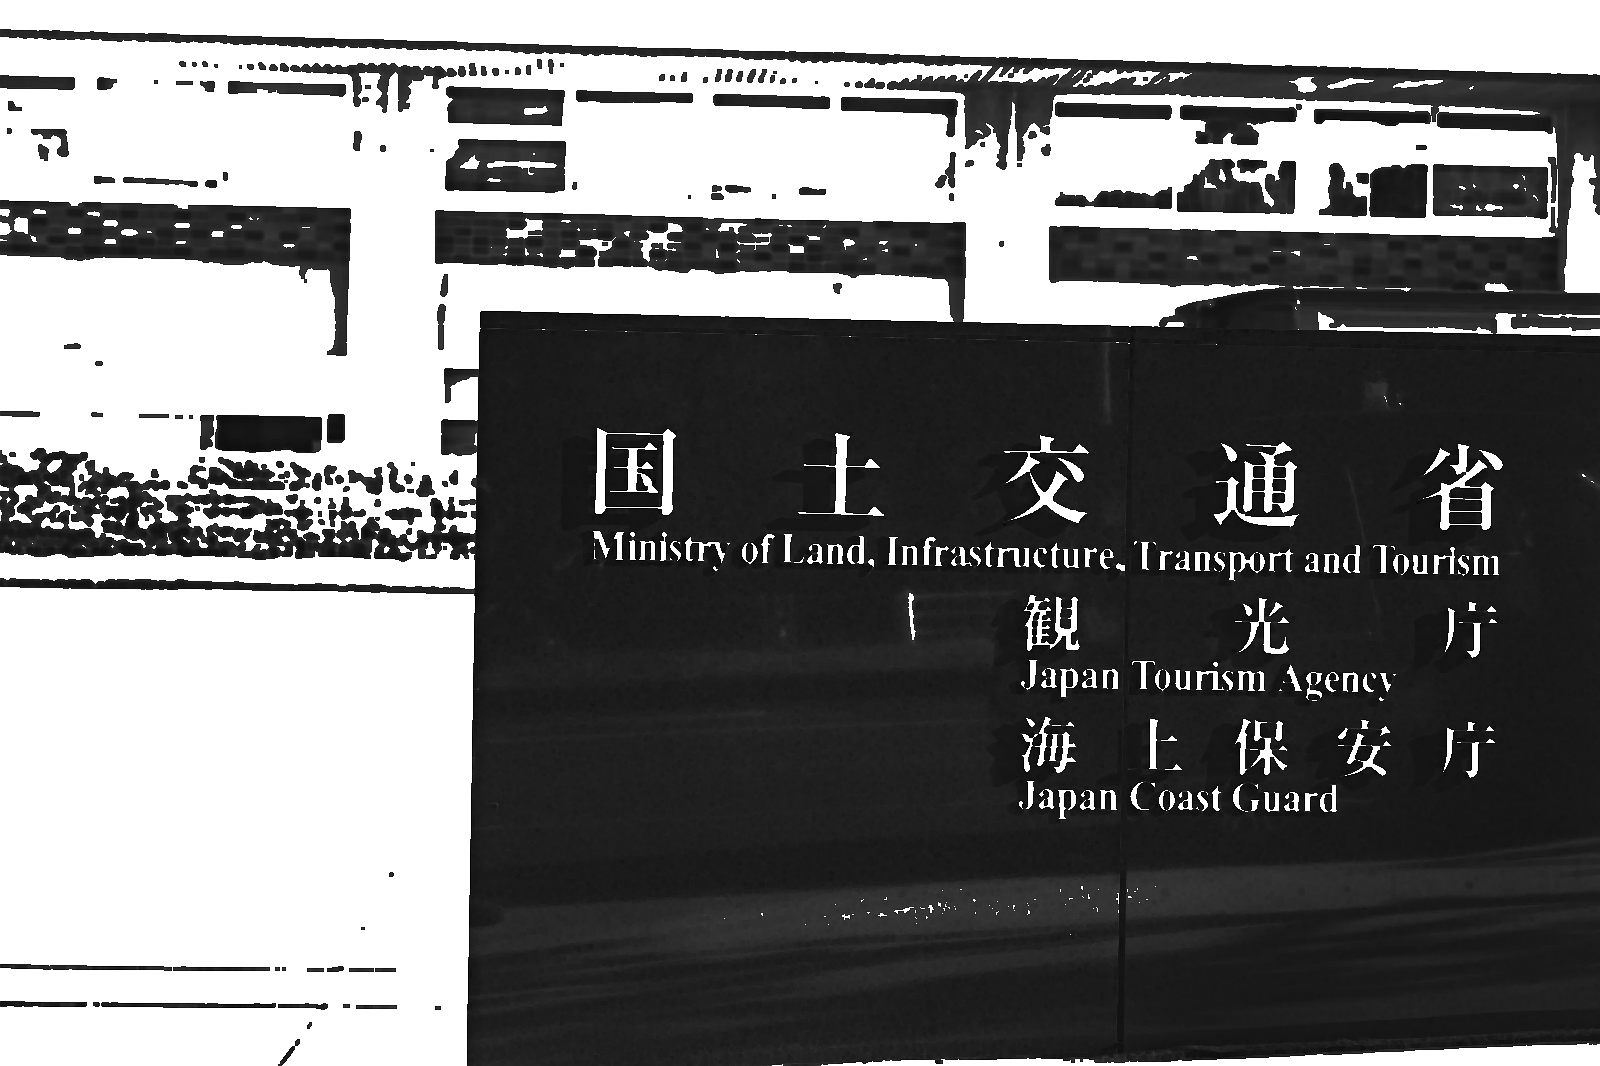

In [40]:
img1 = Image.open('kankoucyou1520_TP_V.jpg')
img1 = ImageOps.invert(img1)
gray = img1.convert("L")                     # グレイスケールに変換
gray=gray.point(lambda x: 0 if x < 200 else x)   # 値が230以下は0になる
gray = ImageOps.invert(gray) #色反転
gray = gray.filter(ImageFilter.MedianFilter()) # それっぽいフィルターを追加
gray = gray.filter(ImageFilter.MinFilter()) # 恐らく収縮
enhancer = ImageEnhance.Sharpness(gray)
gray=enhancer.enhance(1.5)    # シャープ画像

gray

In [42]:
txt1 = tool.image_to_string(
    gray,
    lang='jpn+eng',
    builder=pyocr.builders.TextBuilder(tesseract_layout=4)
)
txt2 = tool.image_to_string(
    gray,
    lang='jpn+eng',
    builder=pyocr.builders.TextBuilder(tesseract_layout=3)
)
txt3 = tool.image_to_string(
    gray,
    lang='jpn+eng',
    builder=pyocr.builders.TextBuilder(tesseract_layout=5)
)
print(txt1)
print("---------------------------------")
print(txt2)
print("---------------------------------")
print(txt3)

Ministry of Land, Infrastructure, Transport and lOurism
agile a

RIETI ae Agencv
tii  anh

JaDan | Guard

boa as
---------------------------------
Ministry of Land, Infrastructure, Transport and lOurism

eg ee ge

Japan lourism Apency

海上 保安 庁

Japan Coast Guard

boa as
---------------------------------
a el
 i *  SLまき 一
i:      w= 間
a  1  コ   a  ae md
1 a      3s
,   i.     qo
i          a4  eo
i        ye] ot oe
      Ns eS
は    IS
に     Nw  ,
lols eee
i Bee
ie        3
『   a      mal       0
| 回 上        |
:  ms      =
・  it      Ss
s    is      =
| ee
-      しっ
=   ll fi
3  N  ニー  a. トド
.       otk
-      =
ip VN     Bits
.  | !    | we
» of   ーー  te
1’  1   om
LF 人     Tn


In [34]:
results = tool.image_to_string(
    gray,
    lang='jpn+eng',
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=4)
)
draw_rectangle = cv2.imread("kankoucyou1520_TP_V.jpg")

for box in results:
    cv2.rectangle(draw_rectangle, box.position[0], box.position[1], (0, 255, 0), 1)
cv2.imwrite('draw_rectangle.png', draw_rectangle)
draw_rectangle = Image.open('draw_rectangle.png')
draw_rectangle


error: OpenCV(4.8.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'
